# Convolution Operations

This notebook demonstrates manual convolution operations using NumPy.
It visualizes how edge detection filters work with different strides.

**Topics Covered:**
- Horizontal edge detection filter
- Vertical edge detection filter
- Stride effects on output dimensions

**Standards Applied:**
- ✅ W&B integration for image tracking
- ✅ Proper documentation and section headers
- ✅ Kernel restart cell (commented out)

## Imports

In [1]:
# Standard library imports
import numpy as np
import matplotlib.pyplot as plt

# Image processing imports
from scipy.ndimage import correlate
from skimage import data
from skimage.color import rgb2gray
from skimage.transform import rescale, resize

# Path setup for project utilities
import sys
sys.path.insert(0, '../..')    # For project root utils/

# W&B integration
from utils.wandb_utils import init_wandb
import wandb

2026-01-03 16:50:46.083442: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/cataluna84/Workspace-Antigravity/Generative_Deep_Learning/.venv/lib/python3.13/site-packages/keras/src/export/tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


## W&B Initialization

In [2]:
# Initialize W&B for experiment tracking
run = init_wandb(
    name="02_02_convolutions",
    config={
        "notebook": "02_02_deep_learning_convolutions",
        "description": "Manual convolution operations with NumPy",
        "image_size": 64,
        "filters": ["horizontal_edge", "vertical_edge"],
    }
)

wandb: Currently logged in as: cataluna84 to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


## Load and Display Original Image

Image shape: (64, 64)
Pixel value range: [0.026, 0.951]


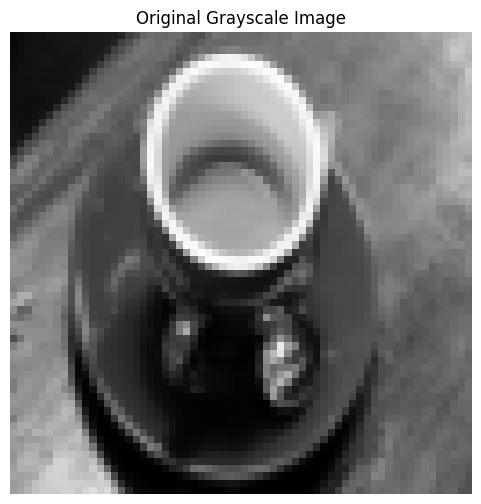

In [3]:
# Load sample image and convert to grayscale
im = rgb2gray(data.coffee())
im = resize(im, (64, 64))

print(f"Image shape: {im.shape}")
print(f"Pixel value range: [{im.min():.3f}, {im.max():.3f}]")

plt.figure(figsize=(6, 6))
plt.axis('off')
plt.title('Original Grayscale Image')
plt.imshow(im, cmap='gray')
plt.show()

# Log to W&B
wandb.log({"original_image": wandb.Image(im, caption="Original Grayscale")})

## Horizontal Edge Detection Filter

This filter detects horizontal edges by computing the difference between
pixels above and below each position.

Horizontal Edge Filter:
[[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


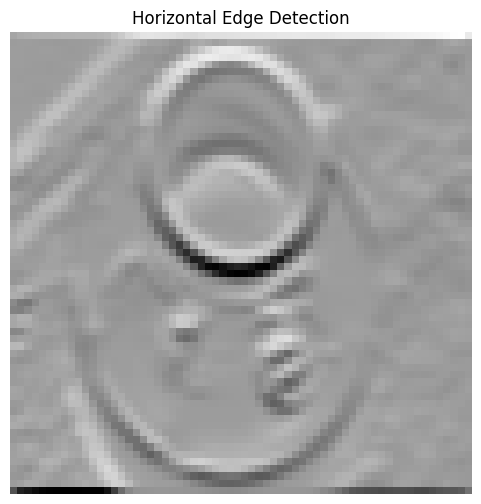

wandb: WARNING Data passed to `wandb.Image` should consist of values in the range [0, 255], image data will be normalized to this range, but behavior will be removed in a future version of wandb.


In [4]:
# Define horizontal edge detection filter
filter_horizontal = np.array([
    [ 1,  1,  1],
    [ 0,  0,  0],
    [-1, -1, -1]
])

print("Horizontal Edge Filter:")
print(filter_horizontal)

# Apply convolution manually
new_image = np.zeros(im.shape)
im_pad = np.pad(im, 1, 'constant')

for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        new_image[i, j] = np.sum(im_pad[i:i+3, j:j+3] * filter_horizontal)

# Display result
plt.figure(figsize=(6, 6))
plt.axis('off')
plt.title('Horizontal Edge Detection')
plt.imshow(new_image, cmap='Greys')
plt.show()

# Log to W&B
wandb.log({"horizontal_edge": wandb.Image(new_image, caption="Horizontal Edge Filter")})

## Vertical Edge Detection Filter

This filter detects vertical edges by computing the difference between
pixels to the left and right of each position.

Vertical Edge Filter:
[[-1  0  1]
 [-1  0  1]
 [-1  0  1]]


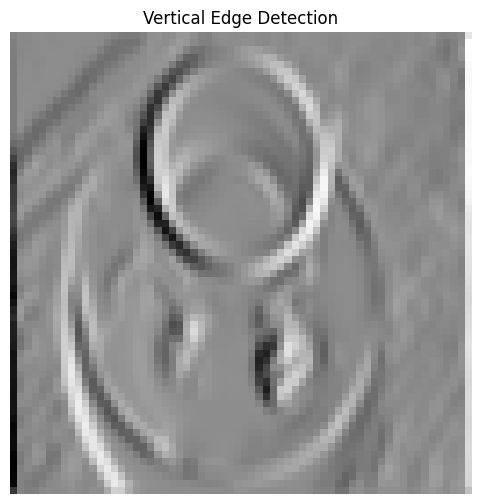

In [5]:
# Define vertical edge detection filter
filter_vertical = np.array([
    [-1,  0,  1],
    [-1,  0,  1],
    [-1,  0,  1]
])

print("Vertical Edge Filter:")
print(filter_vertical)

# Apply convolution manually
new_image = np.zeros(im.shape)
im_pad = np.pad(im, 1, 'constant')

for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        new_image[i, j] = np.sum(im_pad[i:i+3, j:j+3] * filter_vertical)

# Display result
plt.figure(figsize=(6, 6))
plt.axis('off')
plt.title('Vertical Edge Detection')
plt.imshow(new_image, cmap='Greys')
plt.show()

# Log to W&B
wandb.log({"vertical_edge": wandb.Image(new_image, caption="Vertical Edge Filter")})

## Stride Effects

Using a stride > 1 reduces the output dimensions. With stride=2, the output
is half the size in each dimension.

Output shape with stride 2: (32, 32)


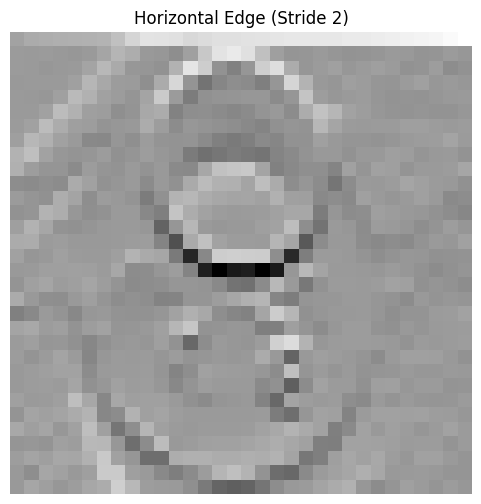

In [6]:
# Horizontal edge with stride 2
stride = 2
output_shape = (im.shape[0] // stride, im.shape[1] // stride)
new_image = np.zeros(output_shape)

im_pad = np.pad(im, 1, 'constant')

for i in range(0, im.shape[0], stride):
    for j in range(0, im.shape[1], stride):
        new_image[i // stride, j // stride] = np.sum(
            im_pad[i:i+3, j:j+3] * filter_horizontal
        )

print(f"Output shape with stride {stride}: {new_image.shape}")

plt.figure(figsize=(6, 6))
plt.axis('off')
plt.title(f'Horizontal Edge (Stride {stride})')
plt.imshow(new_image, cmap='Greys')
plt.show()

# Log to W&B
wandb.log({"horizontal_stride_2": wandb.Image(new_image, caption="Horizontal Edge (Stride 2)")})

Output shape with stride 2: (32, 32)


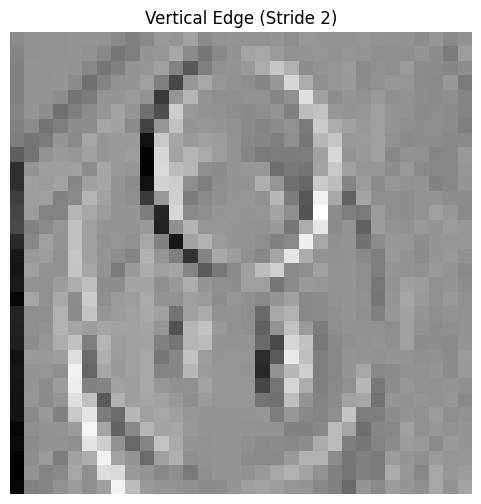

In [7]:
# Vertical edge with stride 2
stride = 2
output_shape = (im.shape[0] // stride, im.shape[1] // stride)
new_image = np.zeros(output_shape)

im_pad = np.pad(im, 1, 'constant')

for i in range(0, im.shape[0], stride):
    for j in range(0, im.shape[1], stride):
        new_image[i // stride, j // stride] = np.sum(
            im_pad[i:i+3, j:j+3] * filter_vertical
        )

print(f"Output shape with stride {stride}: {new_image.shape}")

plt.figure(figsize=(6, 6))
plt.axis('off')
plt.title(f'Vertical Edge (Stride {stride})')
plt.imshow(new_image, cmap='Greys')
plt.show()

# Log to W&B
wandb.log({"vertical_stride_2": wandb.Image(new_image, caption="Vertical Edge (Stride 2)")})

## Summary

| Filter | Description | Output Size (stride=1) | Output Size (stride=2) |
|--------|-------------|------------------------|------------------------|
| Horizontal | Detects horizontal edges | 64×64 | 32×32 |
| Vertical | Detects vertical edges | 64×64 | 32×32 |

## Cleanup

In [8]:
# Finish W&B run
wandb.finish()
print("W&B run finished successfully.")

W&B run finished successfully.


In [9]:
# ═══════════════════════════════════════════════════════════════════════════════
# CLEANUP: Restart kernel to fully release memory
# ═══════════════════════════════════════════════════════════════════════════════
# NOTE: This notebook doesn't use GPU, but kernel restart is still useful
#       to free up memory after processing images.
#
# Only run this cell after all work is complete and saved.

# import IPython
# print("Restarting kernel to release memory...")
# IPython.Application.instance().kernel.do_shutdown(restart=True)